In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('~/Downloads/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


We need to choose a label which has it's values equally distributed.

/home/vivek/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


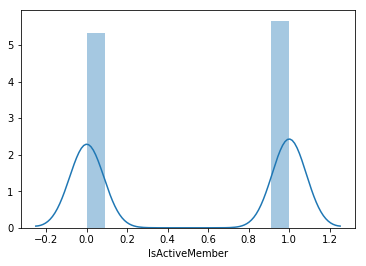

In [4]:
sns.distplot(df['IsActiveMember'])

## Data Preprocessing

In [5]:
df = df.drop(['RowNumber', 'Surname'], 1)

In [6]:
df['Gender'] = df['Gender'].replace('Male', 1)
df['Gender'] = df['Gender'].replace('Female', 0)

In [7]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [8]:
df['France'] = df['Geography'] == 'France'
df['Germany'] = df['Geography'] == 'Germany'
df['Spain'] = df['Geography'] == 'Spain'

In [9]:
df['France'] = df['France'].replace(True, 1)
df['Germany'] = df['Germany'].replace(True, 1)
df['Spain'] = df['Spain'].replace(True, 1)

In [10]:
df = df.drop('Geography',1)
X = df.drop('IsActiveMember',1)
Y = df['IsActiveMember']

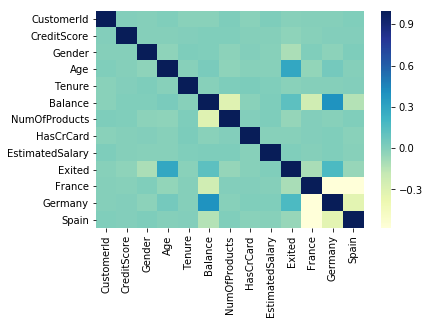

In [11]:
sns.heatmap(X.corr(), cmap="YlGnBu")

From above heat map we can say our data is not correlated. So, it will be tough to have a high test score.

In [12]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
pca = PCA(.95)
X = pca.fit_transform(X)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=43)

In [14]:
X_train

array([[ 1.88992786, -0.48765255, -0.59536101, ..., -0.650021  ,
        -1.91475201,  0.87644245],
       [ 2.1014851 , -0.37610918,  1.73712913, ..., -0.62622797,
         1.4254609 , -0.53673512],
       [ 1.79292177, -0.14356093, -0.73101078, ...,  0.69112   ,
         1.18528503,  0.6766417 ],
       ...,
       [ 1.2432904 , -0.00994378, -0.99627253, ..., -0.62711774,
        -0.55427374,  0.0471401 ],
       [ 0.76178327,  1.62307158, -0.27217001, ...,  0.09209424,
         1.82968907,  0.53978801],
       [ 1.56263648, -0.24809847, -1.64380274, ..., -0.17803529,
         0.18122938,  0.13603509]])

## Vanilla Logistic Regression

In [15]:
Lregr = LogisticRegression(solver='sag')
Lregr.fit(X_train, y_train)
print("Training data score: ", Lregr.score(X_train, y_train))
print("Test data score", Lregr.score(X_test, y_test))

# confusion matrix for test set
Y_pred = Lregr.predict(X_test)
print(confusion_matrix(y_test, Y_pred))

Training data score:  0.5694285714285714
Test data score 0.5616666666666666
[[ 631  796]
 [ 519 1054]]


## Ridge Logistic Regression

In [16]:
ridgeRegr = LogisticRegression(penalty='l2')
ridgeRegr.fit(X_train, y_train)

print("Training data score: ", ridgeRegr.score(X_train, y_train))
print("Test data score", ridgeRegr.score(X_test, y_test))

# confusion matrix for test set
Y_pred = ridgeRegr.predict(X_test)
print(confusion_matrix(y_test, Y_pred))

Training data score:  0.5692857142857143
Test data score 0.5616666666666666
[[ 631  796]
 [ 519 1054]]


## Lasso Logistic Regression

In [17]:
lassoRegr = LogisticRegression(penalty='l1')
lassoRegr.fit(X_train, y_train)
print("Training data score: ", lassoRegr.score(X_train, y_train))
print("Test data score", lassoRegr.score(X_test, y_test))

# confusion matrix for test set
Y_pred = lassoRegr.predict(X_test)
print(confusion_matrix(y_test, Y_pred))

Training data score:  0.5697142857142857
Test data score 0.562
[[ 633  794]
 [ 520 1053]]


All three models performs almost similar to each other. While lasso classifier is slightly better than the other 2 models. Though all the models are not very accurate. I think it is most probably because of the data (as we see on heatmap, data is not correlated).

Regression is very fast model compared to others and it works pretty well with large datasets. But it has some limitations like it should satisfy it's four assumptions for linear regression.

I would have used different dataset for more accuracy.